## ML Part 2-5. k-Means Clustering

## 1.k-Means
- 비지도학습
- 비계층적 군집(clustering) 알고리즘
- 섞여 있는 데이터를 원하는 개수로 군집화
- sklearn API
  - sklearn.cluster.KMeans(n_clusters=8, random_state=None)

  - example (iris) [skikit-learn example](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html?highlight=sklearn%20cluster%20kmeans)
  - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- k가 2인경우의 k-Means 군집화 과정

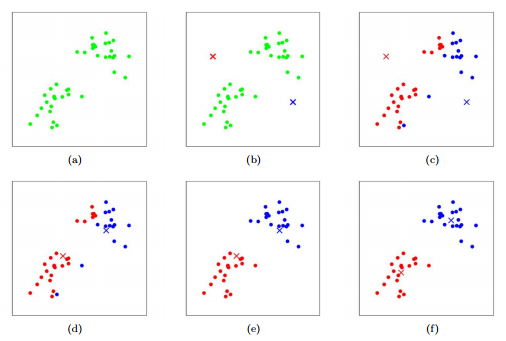

- 출처 : ```http://stanford.edu/~cpiech/cs221/img/kmeansViz.png```

In [ ]:
위의 그림) 2 개로 군집화 하는 과정 설명
(a) 초기상태
(b) 랜덤하게 2개의 중앙점(c1, c2)을 정한다   # c1 :빨강, c2 : 파랑
(c) 두 중앙점에서 각 점의 거리를 구한다
    - c1에 더 가까운 점을 0으로 표시  # 빨강
    - c2에 더 가까운 점을 1로 표시    # 파랑
(d) 0과 1로 표시된 점들의 평균을 내어 새로운 c1, c2 선정
(e) c1, c2가 고정될 때까지 (c) (d) 과정 반복
    - 각 중앙점은 각 데이터의 거리의 합이 가장 작은 점을 의미
(f) 군집 완료! 


## 2.군집 모델 평가
- 실루엣 기법: 데이터에 존재하는 군집의 일관성을 검사하는 방법
- 실루엣 지수: 특정한 데이터가 다른 군집에 비해 자신이 속한 군집에 얼마나 가까운지를 측정하는 지표 ( -1 ~ 1, 1이 가장 좋은 수치)
- 계산이 복잡함
- sklearn.metrics.silhouette_score(X, labels...)
  - X : 학습에 사용된 입력
  - labels : 학습 결과
- Range of SC Interpretation
  - 0.71-1.0  : A strong structure has been found
  - 0.51-0.70 : A reasonable structure has been found
  - 0.26-0.50 : The structure is weak and could be artificial
  - < 0.25 No : substantial structure has been found

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

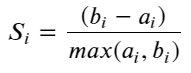

- a(i) : i번째 개체와 같은 군집에 속한 요소들 간 거리들의 평균
- b(i) : i번째 개체와 다른 군집에 속한 요소들 간 거리들의 평균을 군집마다 각각 구한 뒤, 이 가운데 가장 작은 값
- 즉, i번째 개체가 속한 군집과 가장 근접한 군집간, 거리의 평균 값

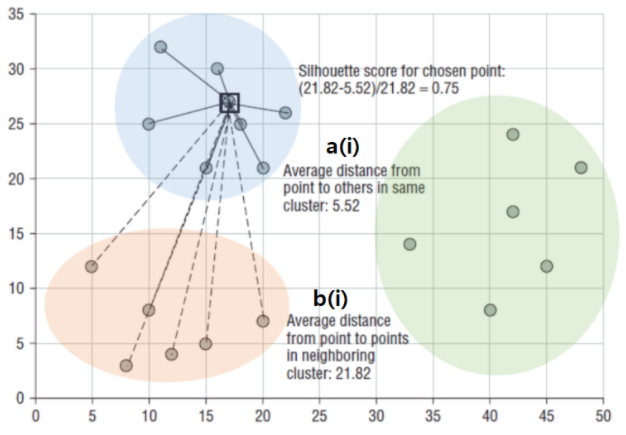

## 3.난수 군집화

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

n = 3
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=n,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

km = KMeans(n_clusters=n,
            init='k-means++', #init='random',
            random_state = 0)
# 군집 결과
#label  = km.fit_predict(X)
km.fit(X)
label = km.labels_
# 군집의 중심점
center = km.cluster_centers_
print(y, label, center, sep='\n')

[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]
[1 2 2 2 1 2 2 1 0 2 1 0 0 2 2 0 0 1 0 1 2 1 2 2 0 1 1 2 0 1 0 0 0 0 2 1 1
 1 2 2 0 0 2 1 1 1 0 2 0 2 1 2 2 1 1 0 2 1 0 2 0 0 0 0 2 0 2 1 2 2 2 1 1 2
 1 2 2 0 0 2 1 1 2 2 1 1 1 0 0 1 1 2 1 2 1 2 0 0 1 1 1 1 0 1 1 2 0 2 2 2 0
 2 1 0 2 0 2 2 0 0 2 1 2 2 1 1 0 1 0 0 0 0 1 0 0 0 2 0 1 0 2 2 1 1 0 0 0 0
 1 1]
[[-1.5947298   2.92236966]
 [ 2.06521743  0.96137409]
 [ 0.9329651   4.35420712]]


In [ ]:
# 색상을 같게 표시하기 위해 숫자 조정
import pandas as pd
mtable = {0:2, 1:1, 2:0}
label2 = pd.Series(label).replace(mtable).to_numpy()

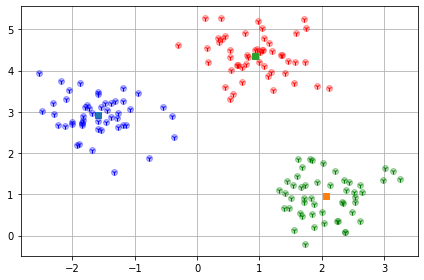

In [ ]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b']
for gno, color in zip(range(n), colors[:n]):
    X_group = X[y==gno]
    plt.plot(X_group[:,0], X_group[:,1], color+'1')
    y_group = X[label2==gno]
    plt.plot(y_group[:,0], y_group[:,1], color+'o', alpha=0.3)
    plt.plot(center[gno,0], center[gno,1], 's')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# 0.5 이상이면 관계있음
score = silhouette_score(X, label, metric='euclidean')
print(score)

0.7143417887288687


In [ ]:
# 군집 결과 얻는 3가지 방법
# 1. fit - fit_predict 사용
km.fit(X)
label = km.predict(X)

# 2. fit_predict 사용
#label = km.fit_predict(X)

# 3. km.labels_ 사용, predict(X) 와 같은 결과
#km.fit(X)
#label = km.labels_

## 4.Choosing Value for k
- Elbow 기법 : k를 몇 개로 하면 좋을까에 대한 알고리즘 

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

n = 5
X, y = make_blobs(n_samples=n*80,
                  n_features=n,
                  centers=n,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

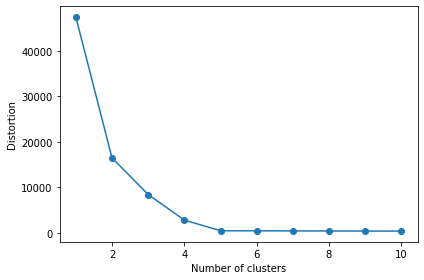

In [ ]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++', #init='random',
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)  # Sum of squared distances of samples to their closest cluster center.

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## 5.k-Means 예제

### 5-01. 손글씨 군집화

In [ ]:
from sklearn.datasets import load_digits 
from sklearn.cluster import KMeans
import matplotlib.pylab as plt 

digits = load_digits() 
km = KMeans(n_clusters=10)
label = km.fit_predict(digits.data)
print(km.cluster_centers_.shape)  # 8

(10, 64)


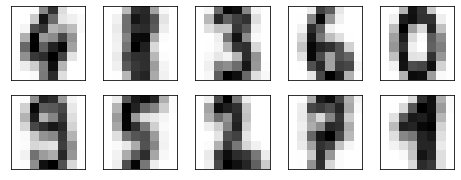

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = km.cluster_centers_.reshape(10, 8,8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

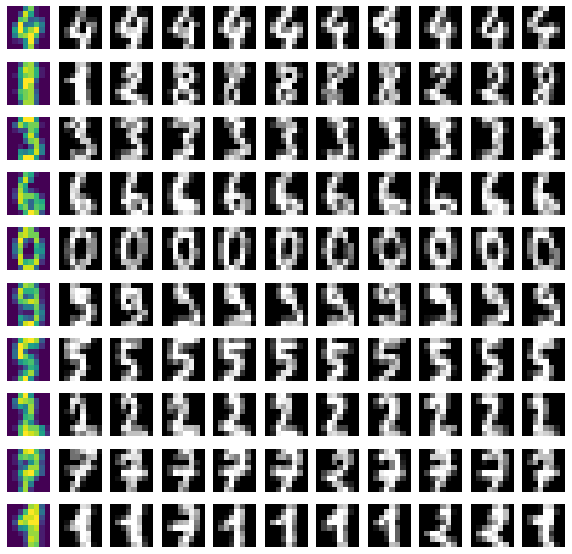

In [ ]:
import cv2, numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(10):
    cent_img = centers[i].reshape(8,8).astype(np.uint8)
    plt.subplot(10, 11, i*11+1)
    plt.imshow(cent_img)
    plt.axis('off')
    
    imgs = digits.data[label==i]
    for j in range(10):
      plt.subplot(10,11, i*11+j+2)
      plt.imshow(imgs[j].reshape(8,8).astype(np.uint8), cmap='gray')
      plt.axis('off')
plt.show()


### 5-02. 컬러 군집화

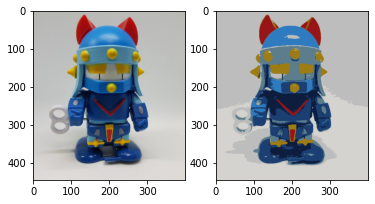

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import cv2

K = 8 # 군집화 개수(8컬러) 
img = cv2.imread('tkv.jpg')
data = img.reshape((-1,3)).astype(np.float32)

kmeans = KMeans(n_clusters=K)
kmeans.fit(data)
label = kmeans.labels_
center =  kmeans.cluster_centers_
center = np.uint8(center)
res = center[label]
res = res.reshape((img.shape))
if 0 :
    plt.subplot(1,2,1)
    plt.imshow(img[:,:,::-1])
    plt.subplot(1,2,2)
    plt.imshow(res[:,:,::-1])


In [ ]:
!wget -O tkv.jpg http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Ftkv.jpg

--2020-12-05 21:41:15--  http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Ftkv.jpg
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44284 (43K) [image/jpeg]
Saving to: ‘tkv.jpg’

tkv.jpg             100%[===================>]  43.25K   113KB/s    in 0.4s    

2020-12-05 21:41:16 (113 KB/s) - ‘tkv.jpg’ saved [44284/44284]



### 5-03. iris 군집화

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn impor preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import pandas as pd
iris = load_iris()
X_data = StandardScaler().fit_transform(iris.data)

In [ ]:
y_data = iris.target
print(y_data)
print(pd.Series(iris.target_names[y_data]).value_counts())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
virginica     50
versicolor    50
setosa        50
dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(X_data)
#label = kmeans.labels_
center =  kmeans.cluster_centers_
print(center)

[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [ ]:
print(pred)
print(pd.Series(pred).value_counts(sort=False))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
0    50
1    53
2    47
dtype: int64


### 5-04. [참고] interactive 그래프

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# IRIS 꽃 데이터를 읽고 순서를 섞는다
iris_df = sns.load_dataset('iris').sample(frac=1).reset_index(drop=True)

# 사용할 X컬럼들과 Y컬럼을 지정한다
x_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y_column  = 'species'

# Y컬럼의 문자열값을 LabelEncoder를 통해 숫자로 바꾼다.
y_true_label_encoder = preprocessing.LabelEncoder()
y_true_encoded       = y_true_label_encoder.fit_transform(iris_df[y_column])

kMeansModels              = dict() # k값별 모델 저장할 딕셔너리
kMeansModelPreds          = dict() # k값별 모델 예측 결과 저장할 딕셔너리
kMeansModelLabelEncoder   = dict() # k값별 라벨인코더 저장할 딕셔너리

sumSquaredDistancesList   = list() # 샘플과 클러스터 센터간 거리 제곱의 합 리스트
silhouetteScoreList       = list() # Silhouette Coefficient 평균 리스트

ks = [2,3,4,5,6,7,8,9] # k값으로 2부터 9까지 테스트한다
for k in ks: # k값 순회
    model = KMeans(n_clusters=k, random_state=0, n_init=100)  # k개 클러스터로 모델 생성
    cluster_labels = model.fit_predict(iris_df[x_columns]) # X컬럼으로 지정된 필드값으로 피팅
    
    y_pred_label_encoder = preprocessing.LabelEncoder() # 예측한 클러스터에서 사용할 라벨인코더
    # 초기 임의 값 (unknown 1, unknown 2...) 으로 인코딩한다
    y_pred_label_encoder.fit(np.array(['unknown ' + str(i+1) for i in range(0, k, 1)], dtype=object))
    for pred_label_num in range(0,k,1): # 각 클러스터 순회        
        # 해당 클러스터에서 가장 많이 출력한 실제 값의 인덱스를 구한다
        most_frequent_index = np.argmax(np.bincount(y_true_encoded[cluster_labels==pred_label_num]))
        # 구한 인덱스의 라벨을 구해서 해당클러스터 라벨로 업데이트한다
        y_pred_label_encoder.classes_[pred_label_num] = y_true_label_encoder.classes_[most_frequent_index]
    
    kMeansModels[k]     = model                       # 모델 저장
    kMeansModelPreds[k] = cluster_labels              # 모델 예측결과 저장     
    kMeansModelLabelEncoder[k] = y_pred_label_encoder # 라벨인코더 저장
    sumSquaredDistancesList.append(model.inertia_)    # # 샘플과 클러스터 센터간 거리 제곱의 합 저장
    silhouetteScoreList.append(silhouette_score(iris_df[x_columns].values, cluster_labels)) # Silhouette Score저장
	
def render_plot(x_col='petal_length', y_col='petal_width', k=3):
    y_pred        = kMeansModelPreds[k]        # 모델 예측값
    label_encoder = kMeansModelLabelEncoder[k] # 라벨인코더
    
    # 원본과 예측값을 합쳐 데이터셋을 준비
    mdf = pd.concat([iris_df, pd.DataFrame(label_encoder.inverse_transform(y_pred), columns=[y_column+'_pred'])], axis=1)
    
    plt.figure(figsize=(15,8)) # 출력 크기를 지정
    
    ddf = mdf[mdf[y_column] != mdf[y_column+'_pred']] # 실제라벨과 예측라벨이 틀린 경우 추출
    # X기호로 error임을 표시한다
    plt.scatter(x=ddf[x_col], y=ddf[y_col], c='black', marker='x', s=300, label='error') 
    
    colors = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black'] # 컬러값 리스트
    for (idx,cls) in enumerate(list(y_true_label_encoder.classes_)):
        ddf = mdf[mdf[y_column] == cls] # 실제라벨 데이터는 작은 점으로 출력
        plt.scatter(x=ddf[x_col], y=ddf[y_col], c=colors[idx], marker='.', linewidths=3, s=50, label=cls)
        ddf = mdf[mdf[y_column+'_pred'] == cls] # 예측라벨 데이터는 큰 원으로 출력
        plt.scatter(x=ddf[x_col], y=ddf[y_col], c=colors[idx], marker='o', linewidths=13, s=2, label=cls+' pred')
    
    plt.legend();plt.xlabel(x_col);plt.ylabel(y_col)
    print('accuracy {:.2f}'.format(np.mean(mdf[y_column] == mdf[y_column+'_pred']))) # 정확도 출력
    plt.show()
	
interact(render_plot, x_col=x_columns, y_col=x_columns, k=ks)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)>